In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import copy


In [12]:
data = pd.read_csv('TSLA.csv')


In [13]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-04-11,53.660000,54.099998,53.119999,53.683998,49179500,0,0.0
1,2019-04-12,54.043999,54.389999,53.366001,53.540001,33730000,0,0.0
2,2019-04-15,53.726002,53.776001,51.726002,53.276001,50193000,0,0.0
3,2019-04-16,53.150002,55.000000,52.944000,54.672001,36364500,0,0.0
4,2019-04-17,54.950001,54.958000,53.708000,54.245998,25632500,0,0.0


In [14]:
# 最后两列没用，去掉
data = data.iloc[:,:6]
base_data = copy.deepcopy(data)

In [15]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2019-04-11,53.660000,54.099998,53.119999,53.683998,49179500
1,2019-04-12,54.043999,54.389999,53.366001,53.540001,33730000
2,2019-04-15,53.726002,53.776001,51.726002,53.276001,50193000
3,2019-04-16,53.150002,55.000000,52.944000,54.672001,36364500
4,2019-04-17,54.950001,54.958000,53.708000,54.245998,25632500


In [16]:
data['Date'] = pd.to_datetime(data['Date'])


In [17]:
train_data = data[:-30]
test_data = data[-30:]

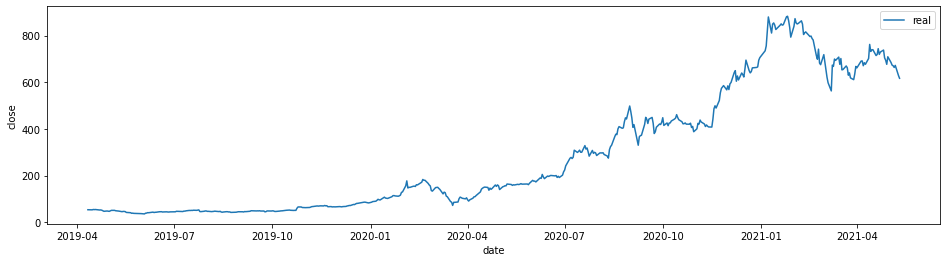

In [18]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 4.0)

plt.xlabel("date")
plt.ylabel("close")

plt.plot(data['Date'], data['Close'], label='real')


plt.legend(loc='upper right')
plt.savefig("close.png",dpi=200)
plt.show()

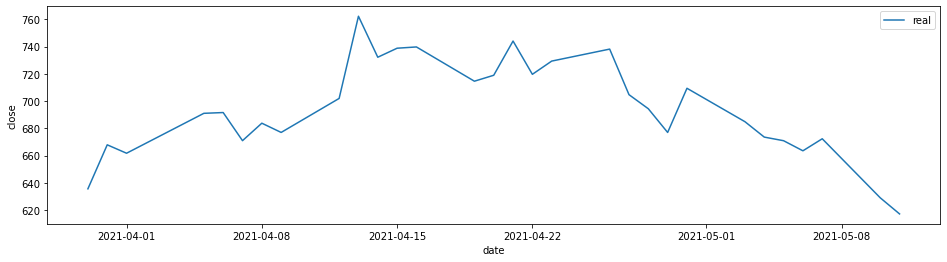

In [19]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 4.0)

plt.xlabel("date")
plt.ylabel("close")

plt.plot(test_data['Date'], test_data['Close'], label='real')


plt.legend(loc='upper right')
plt.savefig("last_month_close.png",dpi=200)
plt.show()

In [20]:
# 引入过去的数据
def import_pass_info(final_data, base_data, columns, day):
    # 去掉最后几天的数据
    next_day_data = base_data[:-day]
    # 补充前面缺失的数据
    head_data = pd.DataFrame(columns=columns)
    # 缺失几行补几行
    for i in range(day):
        l = {'Close':np.nan}
        head_data = head_data.append(l,ignore_index=True)
    # 补充前面数据
    concat_data = pd.concat([head_data,next_day_data],axis=0)
    # 将字段换一下名称
    concat_data.columns = ["next_{}_".format(day) + i for i in columns]
    # 去除索引
    concat_data = concat_data.reset_index().drop(['index'],axis=1)
    # 合并数据
    data = pd.concat([final_data, concat_data],axis=1)
    
    # 和真实数据合并
    return data

In [21]:
columns = list(data.columns)

In [22]:
columns

['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

In [23]:
# 获取过去5天的数据
for i in range(1, 6):
    data = import_pass_info(data, base_data, columns, i)

In [24]:
data

,Date,Open,High,Low,Close,Volume,next_1_Date,next_1_Open,next_1_High,next_1_Low,...,next_4_High,next_4_Low,next_4_Close,next_4_Volume,next_5_Date,next_5_Open,next_5_High,next_5_Low,next_5_Close,next_5_Volume
0,2019-04-11,53.660000,54.099998,53.119999,53.683998,49179500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-04-12,54.043999,54.389999,53.366001,53.540001,33730000,2019-04-11,53.660000,54.099998,53.119999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-04-15,53.726002,53.776001,51.726002,53.276001,50193000,2019-04-12,54.043999,54.389999,53.366001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-04-16,53.150002,55.000000,52.944000,54.672001,36364500,2019-04-15,53.726002,53.776001,51.726002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-04-17,54.950001,54.958000,53.708000,54.245998,25632500,2019-04-16,53.150002,55.000000,52.944000,...,54.099998,53.119999,53.683998,49179500,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,2021-05-05,681.059998,685.299988,667.340027,670.940002,21901900,2021-05-04,678.940002,683.450012,657.700012,...,702.250000,668.500000,677.000000,28845400,2021-04-28,696.409973,708.500000,693.599976,694.400024,22271000
521,2021-05-06,680.760010,681.020020,650.000000,663.539978,27784600,2021-05-05,681.059998,685.299988,667.340027,...,715.469971,666.140015,709.440002,40686400,2021-04-29,699.510010,702.250000,668.500000,677.000000,28845400
522,2021-05-07,665.799988,690.000000,660.219971,672.369995,23422100,2021-05-06,680.760010,681.020020,650.000000,...,706.000000,680.500000,684.900024,27043100,2021-04-30,667.590027,715.469971,666.140015,709.440002,40686400
523,2021-05-10,664.900024,665.049988,627.609985,629.039978,31392400,2021-05-07,665.799988,690.000000,660.219971,...,683.450012,657.700012,673.599976,29739300,2021-05-03,703.799988,706.000000,680.500000,684.900024,27043100


In [25]:
# 去掉含nan值的数据
data = data.dropna()
# 去掉所有日期
for i in range(1,6):
    data = data.drop(['next_{}_Date'.format(i)],axis=1)

# 由于要预测的是未来一天，所以未来一天的所有数据也是未知的，去除掉open,high,low,volume（保留过去5天的这些字段）
data = data.drop(['Open','High','Low',"Volume"],axis=1)
data

,Date,Close,next_1_Open,next_1_High,next_1_Low,next_1_Close,next_1_Volume,next_2_Open,next_2_High,next_2_Low,...,next_4_Open,next_4_High,next_4_Low,next_4_Close,next_4_Volume,next_5_Open,next_5_High,next_5_Low,next_5_Close,next_5_Volume
5,2019-04-18,54.652000,54.950001,54.958000,53.708000,54.245998,25632500,53.150002,55.000000,52.944000,...,54.043999,54.389999,53.366001,53.540001,33730000,53.660000,54.099998,53.119999,53.683998,49179500
6,2019-04-22,52.549999,54.245998,54.967999,53.950001,54.652000,29381500,54.950001,54.958000,53.708000,...,53.726002,53.776001,51.726002,53.276001,50193000,54.043999,54.389999,53.366001,53.540001,33730000
7,2019-04-23,52.779999,53.799999,53.936001,52.495998,52.549999,60735500,54.245998,54.967999,53.950001,...,53.150002,55.000000,52.944000,54.672001,36364500,53.726002,53.776001,51.726002,53.276001,50193000
8,2019-04-24,51.731998,52.029999,53.119999,51.150002,52.779999,54719500,53.799999,53.936001,52.495998,...,54.950001,54.958000,53.708000,54.245998,25632500,53.150002,55.000000,52.944000,54.672001,36364500
9,2019-04-25,49.526001,52.770000,53.063999,51.599998,51.731998,53637500,52.029999,53.119999,51.150002,...,54.245998,54.967999,53.950001,54.652000,29381500,54.950001,54.958000,53.708000,54.245998,25632500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,2021-05-05,670.940002,678.940002,683.450012,657.700012,673.599976,29739300,703.799988,706.000000,680.500000,...,699.510010,702.250000,668.500000,677.000000,28845400,696.409973,708.500000,693.599976,694.400024,22271000
521,2021-05-06,663.539978,681.059998,685.299988,667.340027,670.940002,21901900,678.940002,683.450012,657.700012,...,667.590027,715.469971,666.140015,709.440002,40686400,699.510010,702.250000,668.500000,677.000000,28845400
522,2021-05-07,672.369995,680.760010,681.020020,650.000000,663.539978,27784600,681.059998,685.299988,667.340027,...,703.799988,706.000000,680.500000,684.900024,27043100,667.590027,715.469971,666.140015,709.440002,40686400
523,2021-05-10,629.039978,665.799988,690.000000,660.219971,672.369995,23422100,680.760010,681.020020,650.000000,...,678.940002,683.450012,657.700012,673.599976,29739300,703.799988,706.000000,680.500000,684.900024,27043100


In [16]:
# 因为数据量太小，所以只使用最后22个交易日作为测试集（差不多一个月），倒数50到倒数22个交易日的数据作为验证集
test_data = data[-22:]
valid_data = data[-50:-22]
train_data = data[:-50]

In [17]:
# 提取训练集，验证集，测试集的close，并且去掉close
y_train = train_data['Close']
X_train = train_data.drop(['Close'],axis=1)

y_valid = valid_data['Close']
X_valid = valid_data.drop(['Close'],axis=1)

y_test = test_data['Close']
X_test = test_data.drop(['Close'],axis=1)

In [18]:
# 提取date用于画图
train_date = X_train['Date']
valid_date = X_valid['Date']
test_date  = X_test['Date']


In [19]:
# 去掉date
X_train = X_train.drop(['Date'],axis=1)
X_valid = X_valid.drop(['Date'],axis=1)
X_test = X_test.drop(['Date'],axis=1)

In [20]:
# 转化为numpy向量
X_train = np.array(X_train)
y_train = np.array(y_train)

X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [21]:
# scaler
from sklearn import preprocessing

scaler_X = preprocessing.MinMaxScaler()

scaler_X.fit(X_train) 
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)
X_valid = scaler_X.transform(X_valid)


# linear regression

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
train_predictions = model.predict(X_train)
valid_predictions = model.predict(X_valid)

In [24]:
# 查看mse
train_mse = metrics.mean_squared_error(y_train, train_predictions)
valid_mse = metrics.mean_squared_error(y_valid, valid_predictions) 
print("train mse: {} valid mse: {}".format(train_mse, valid_mse))

train mse: 185.24908342782473 valid mse: 1403.3426125476794


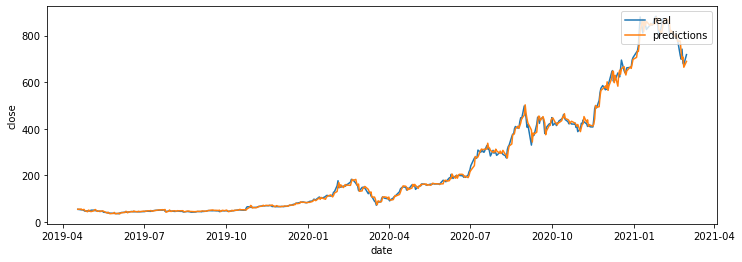

In [25]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 4.0)

plt.xlabel("date")
plt.ylabel("close")

plt.plot(train_date, y_train, label='real')
plt.plot(train_date, train_predictions, label='predictions')


plt.legend(loc='upper right')
plt.savefig("train-predict-linear-scaler.png",dpi=200)
plt.show()

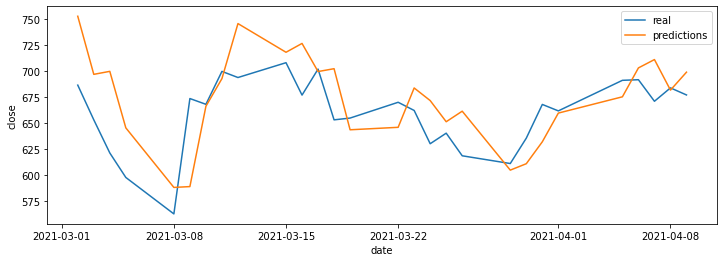

In [26]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 4.0)

plt.xlabel("date")
plt.ylabel("close")

plt.plot(valid_date, y_valid, label='real')
plt.plot(valid_date, valid_predictions, label='predictions')


plt.legend(loc='upper right')
plt.savefig("valid-predict-linear-scaler.png",dpi=200)
plt.show()

In [27]:
test_predictions = model.predict(X_test)
test_mse = metrics.mean_squared_error(y_test, test_predictions)
print('test_mse: {}'.format(test_mse))

test_mse: 699.818253553175


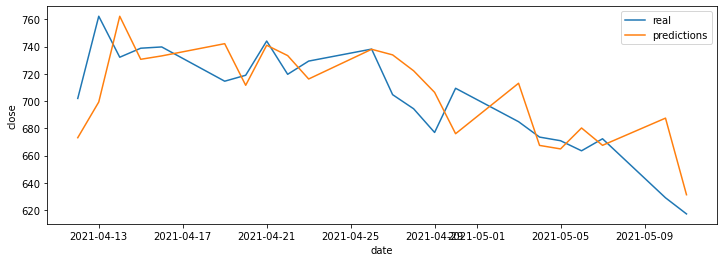

In [28]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 4.0)

plt.xlabel("date")
plt.ylabel("close")

plt.plot(test_date, y_test, label='real')
plt.plot(test_date, test_predictions, label='predictions')


plt.legend(loc='upper right')
plt.savefig("test-predict-linear-scaler.png",dpi=200)
plt.show()

# SGD regrerssion

In [29]:
from sklearn.linear_model import SGDRegressor
model=SGDRegressor(random_state=6)
model.fit(X_train, y_train)

SGDRegressor(random_state=6)

In [30]:
train_predictions = model.predict(X_train)
valid_predictions = model.predict(X_valid)

In [31]:
# 查看mse
train_mse = metrics.mean_squared_error(y_train, train_predictions)
valid_mse = metrics.mean_squared_error(y_valid, valid_predictions) 
print("train mse: {} valid mse: {}".format(train_mse, valid_mse))


train mse: 437.51056610932966 valid mse: 1843.1334836449837


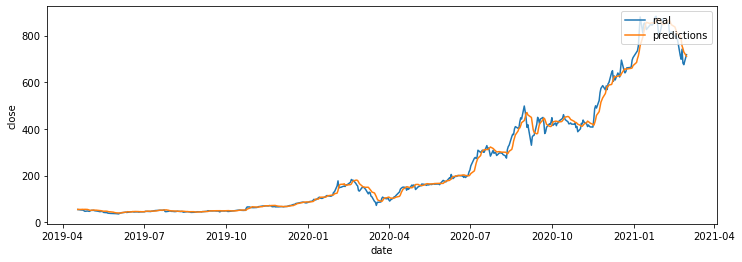

In [32]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 4.0)

plt.xlabel("date")
plt.ylabel("close")

plt.plot(train_date, y_train, label='real')
plt.plot(train_date, train_predictions, label='predictions')


plt.legend(loc='upper right')
plt.savefig("train-predict-sgd-scaler.png",dpi=200)
plt.show()

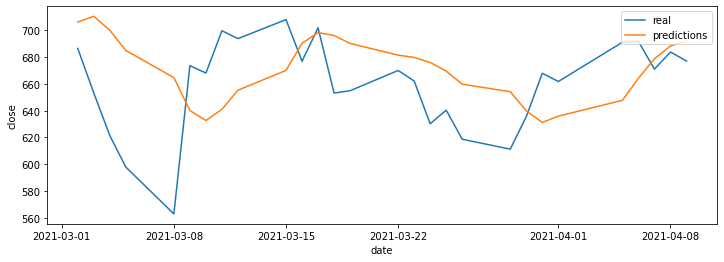

In [33]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 4.0)

plt.xlabel("date")
plt.ylabel("close")

plt.plot(valid_date, y_valid, label='real')
plt.plot(valid_date, valid_predictions, label='predictions')


plt.legend(loc='upper right')
plt.savefig("valid-predict-sgd-scaler.png",dpi=200)
plt.show()

In [34]:
test_predictions = model.predict(X_test)
test_mse = metrics.mean_squared_error(y_test, test_predictions)
print('test_mse: {}'.format(test_mse))

test_mse: 1004.1069401811499


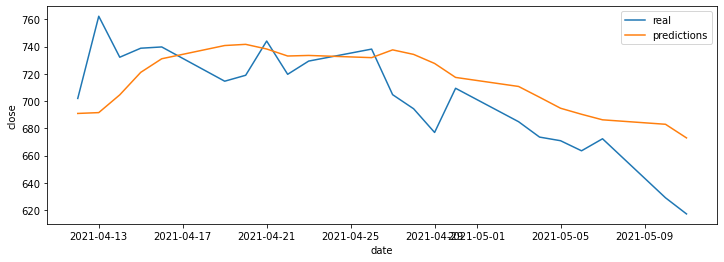

In [35]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 4.0)

plt.xlabel("date")
plt.ylabel("close")

plt.plot(test_date, y_test, label='real')
plt.plot(test_date, test_predictions, label='predictions')


plt.legend(loc='upper right')
plt.savefig("test-predict-sgd-scaler.png",dpi=200)
plt.show()